In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
import pandas as pd

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [3]:
x_train = x_train / 255
x_test = x_test / 255
x_train.shape

(50000, 32, 32, 3)

In [11]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),

    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu',padding='same'),
    BatchNormalization(),

    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),

    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_3 (Batc  (None, 30, 30, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 15, 64)        36928     
                                                                 
 batch_normalization_4 (Batc  (None, 15, 15, 64)      

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=20,
                    shuffle=True,
                    validation_data=(x_test, y_test))

Epoch 1/20


Z:\ml\ml\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


782/782 [==============================] - 27s 27ms/step - loss: 2.5702 - accuracy: 0.1634 - val_loss: 2.0040 - val_accuracy: 0.2553
Epoch 2/20
782/782 [==============================] - 19s 24ms/step - loss: 2.0672 - accuracy: 0.2401 - val_loss: 1.7655 - val_accuracy: 0.3426
Epoch 3/20
782/782 [==============================] - 18s 23ms/step - loss: 1.8829 - accuracy: 0.3010 - val_loss: 1.6215 - val_accuracy: 0.3888
Epoch 4/20
782/782 [==============================] - 16s 20ms/step - loss: 1.7527 - accuracy: 0.3528 - val_loss: 1.5231 - val_accuracy: 0.4293
Epoch 5/20
782/782 [==============================] - 17s 21ms/step - loss: 1.6650 - accuracy: 0.3872 - val_loss: 1.4643 - val_accuracy: 0.4587
Epoch 6/20
782/782 [==============================] - 19s 24ms/step - loss: 1.5932 - accuracy: 0.4175 - val_loss: 1.4688 - val_accuracy: 0.4667
Epoch 7/20
782/782 [==============================] - 18s 23ms/step - loss: 1.5256 - accuracy: 0.4458 - val_loss: 1.5661 - val_accuracy: 0.4566
Epo

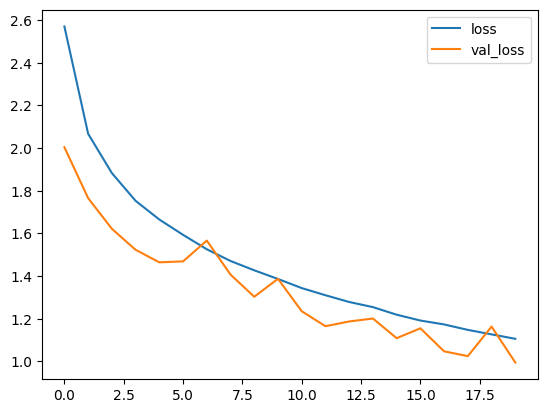

In [10]:
metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot();

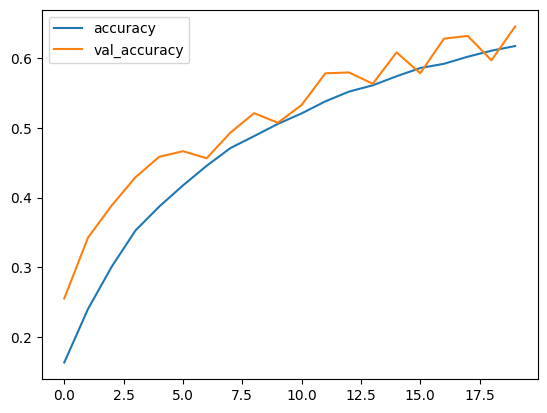

In [8]:
metrics_df[["accuracy","val_accuracy"]].plot();